# Usando la validación del dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Tercero/FSI/Practica/LEGO/train'
validation_data_dir = '/content/drive/My Drive/Tercero/FSI/Practica/LEGO/valid'

train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  shear_range=0.2,
                  zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=True,
        interpolation = 'bicubic',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        interpolation = 'bicubic',
        class_mode='categorical')

Found 1988 images belonging to 5 classes.
Found 1979 images belonging to 5 classes.


In [0]:
# MODEL --------------------------------------------------
model = Sequential()

model.add(Conv2D(32, padding='valid', kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               10616960  
__________

Epoch 1/10
100/100 [==============================] - 160s 2s/step - loss: 0.9483 - acc: 0.6070 - val_loss: 0.5110 - val_acc: 0.8132
Epoch 2/10
100/100 [==============================] - 154s 2s/step - loss: 0.7135 - acc: 0.6905 - val_loss: 0.3807 - val_acc: 0.8906
Epoch 3/10
100/100 [==============================] - 154s 2s/step - loss: 0.5727 - acc: 0.7647 - val_loss: 0.2543 - val_acc: 0.9377
Epoch 4/10
100/100 [==============================] - 155s 2s/step - loss: 0.4716 - acc: 0.8140 - val_loss: 0.1863 - val_acc: 0.9492
Epoch 5/10
100/100 [==============================] - 155s 2s/step - loss: 0.4031 - acc: 0.8455 - val_loss: 0.1622 - val_acc: 0.9498
Epoch 6/10
100/100 [==============================] - 156s 2s/step - loss: 0.3689 - acc: 0.8605 - val_loss: 0.1383 - val_acc: 0.9574
Epoch 7/10
100/100 [==============================] - 153s 2s/step - loss: 0.3176 - acc: 0.8710 - val_loss: 0.1079 - val_acc: 0.9696
Epoch 8/10
100/100 [==============================] - 153s 2s/step - 

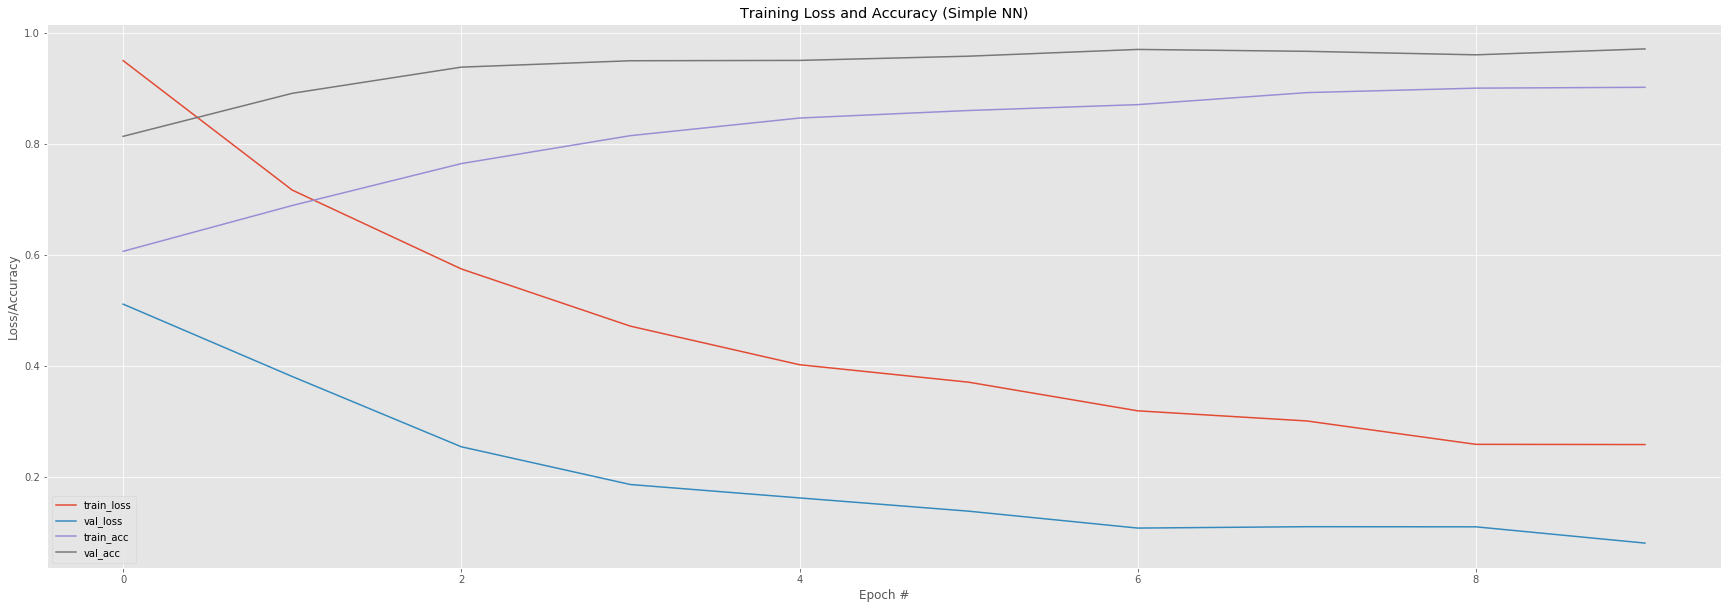

In [0]:
# TRAINING --------------------------------------------------

epochs = 10

H = model.fit_generator(
        train_generator,
        steps_per_epoch= 100,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps= 100,
)

import matplotlib.pyplot as plt
import numpy as np

N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(10, 10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Entrenamiento con datos bien divididos

Found 1592 images belonging to 5 classes.
Found 396 images belonging to 5 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
___________________________________________________________

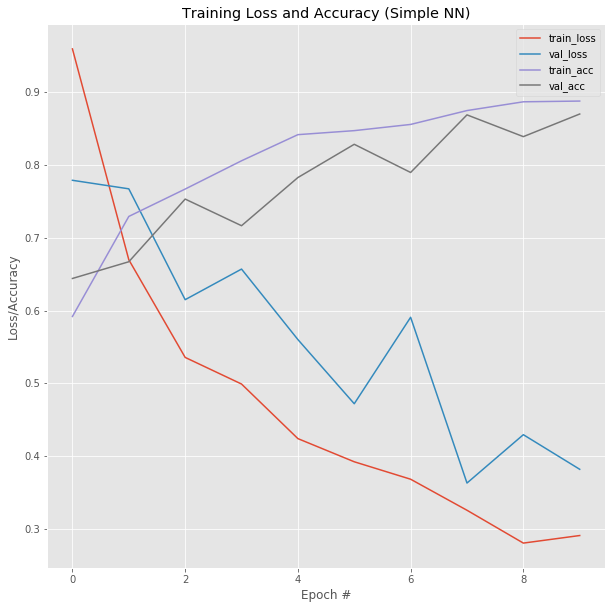

In [0]:
# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Tercero/FSI/Practica/LEGO/train'

train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  shear_range=0.2,
                  zoom_range=0.2,
                  validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        subset='training',
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=True,
        interpolation = 'bicubic',
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        subset='validation',
        target_size=(150, 150),
        batch_size=32,
        interpolation = 'bicubic',
        class_mode='categorical')

# MODEL --------------------------------------------------
model = Sequential()

model.add(Conv2D(32, padding='valid', kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

# TRAINING --------------------------------------------------

epochs = 10

H = model.fit_generator(
        train_generator,
        steps_per_epoch= 100,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps= 100,
)

import matplotlib.pyplot as plt
import numpy as np

N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(10, 10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [0]:
# MODEL --------------------------------------------------
from keras.applications import vgg16

vgcc16_model = vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(150,150,3), pooling=None)

vgcc16 = Sequential()

vgcc16.add(vgcc16_model)

vgcc16.add(Dropout(0.25))

vgcc16.add(Flatten())

vgcc16.add(Dense(128, activation='relu'))
vgcc16.add(Dropout(0.5))
vgcc16.add(Dense(5, activation='softmax'))

vgcc16.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 10

H = vgcc16.fit_generator(
        train_generator,
        steps_per_epoch= 100,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps= 100,
)

import matplotlib.pyplot as plt
import numpy as np

N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(10, 10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()